In [ ]:
# !pip install us

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
from us import states

In [2]:
c = Census("a82acbcf878654f6da6b3139274b90ff160b8120")

In [3]:
az_df = pd.DataFrame(c.acs5.state_county_tract(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E', 'B02001_002E'),
                                      state_fips = states.AZ.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2020)
                        )
az_df["GEOID"] = az_df["state"] + az_df["county"] + az_df["tract"]
az_df = az_df.drop(columns = ["state", "county"])

az_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2020/TRACT/tl_2020_04_tract.zip").to_crs(epsg = 32617)
az_df = az_tract.merge(az_df, on = "GEOID")

# now set up our first plot

az_minority_tract = az_df[["STATEFP", "COUNTYFP", "TRACTCE", "GEOID", "geometry", "C17002_001E",
                              "C17002_002E", "C17002_003E", "B01003_001E", "B02001_002E"]]

az_minority_county = az_minority_tract.dissolve(by = 'TRACTCE', aggfunc = 'sum')

az_minority_county["White_Rate"] = (az_minority_county["B02001_002E"]) / az_minority_county["B01003_001E"] * 100
az_minority_county["Non_White_Rate"] = (1-(az_minority_county["B02001_002E"] / az_minority_county["B01003_001E"])) * 100


Text(0.5, 1.0, 'Non-White Rates (%) in Arizona')

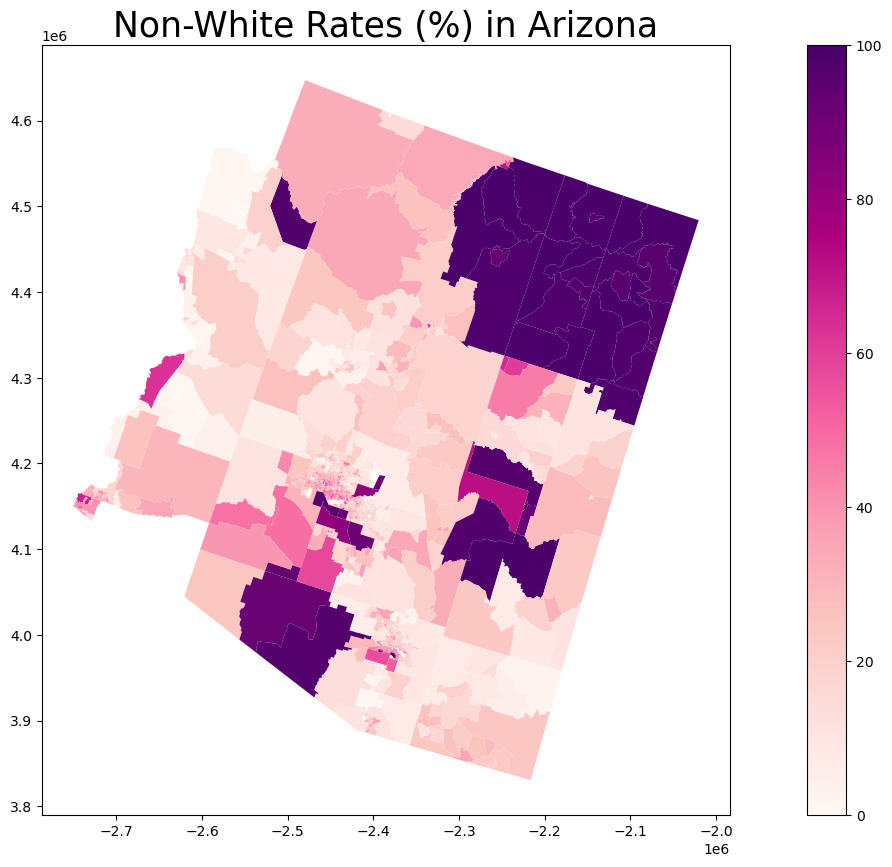

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
az_minority_county.plot(column = "Non_White_Rate",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

# add to this graph: redlines around majority minority tracts 
# todo mapping team

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Non-White Rates (%) in Arizona', fontdict = {'fontsize': '25', 'fontweight' : '3'})

In [6]:
az_minority_county['Majority_Minority'] = (az_minority_county["White_Rate"] < 50).astype(int)

Text(0.5, 1.0, 'White Rates (%) in Arizona')

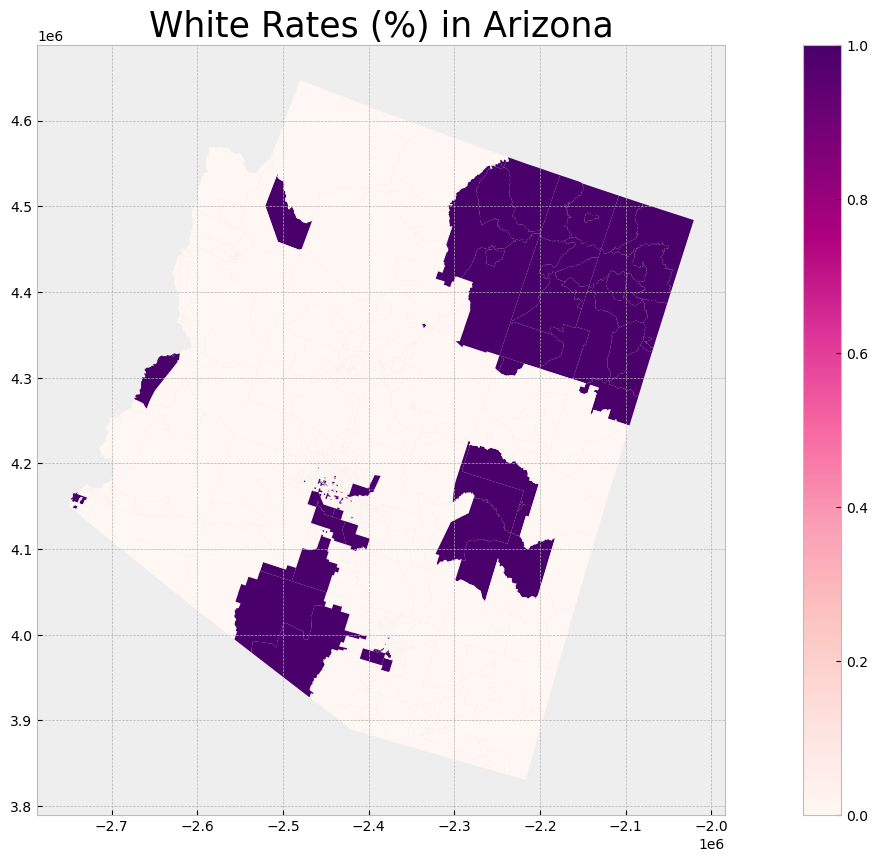

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
az_minority_county.plot(column = "Majority_Minority",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

# add county/tract boundaries?
#todo 
# can these be colored by the Majority_Minority?

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Majority Minority Counties in Arizona', fontdict = {'fontsize': '25', 'fontweight' : '3'})